In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mlt
import seaborn as sns
from bokeh.plotting import figure,show,output_notebook
import math
from scipy.stats import norm
from scipy import stats
import statistics as stats
import pandas_profiling as prof
import warnings
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\ProgramDa

In [2]:
EDA='.//EDA//'

# Team Standing for 2013,14,15,16

In [3]:
Team_stats_2013=pd.read_csv(EDA+'Team_stats_2013.csv')
Team_stats_2014=pd.read_csv(EDA+'Team_stats_2014.csv')
Team_stats_2015=pd.read_csv(EDA+'Team_stats_2015.csv')
Team_stats_2016=pd.read_csv(EDA+'Team_stats_2016.csv')

# Team performance from 2012-16

In [4]:
EPL_Performance_2012_16=pd.read_csv(EDA+'EPL_Performance_2012_16.csv')

# Team detail from 2012-16

In [21]:
EPL2012_16=pd.read_csv(EDA+'EPL_2012_16.csv',parse_dates=['Date'])

In [22]:
EPL2012_16.season=EPL2012_16.season.astype('category')

In [23]:
EPL2012_16.groupby('Full_Time')['Full_Time'].count()

Full_Time
Draw       403
Home       677
Visitor    441
Name: Full_Time, dtype: int64

# Pie chart representation total win lose and draw from 2012 till 2016

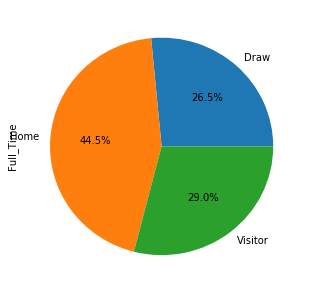

In [24]:
EPL2012_16.groupby('Full_Time')['Full_Time'].count().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5));

#  Examine the total goals per season over time using a line graph.

```The total number of goals gone down in 2014-15 season, due to poor performance from the High valued team.```

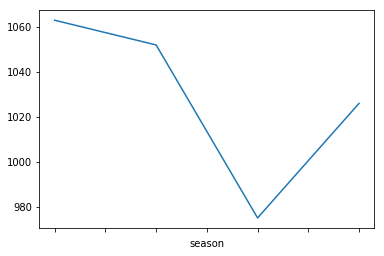

In [25]:
EPL2012_16['total_goals'] = EPL2012_16['FTAG'] + EPL2012_16['FTHG']
EPL2012_16.groupby('season')['total_goals'].sum().plot();

Text(0.5,0,'season')

Text(0,0.5,'Average Goals')

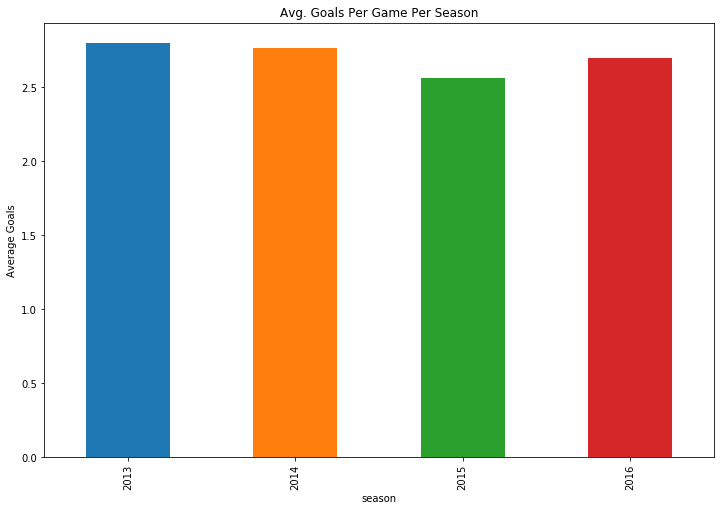

In [26]:
# show average goals per game per season
avg = EPL2012_16.groupby('season')['total_goals'].mean().plot(kind="bar", title="Avg. Goals Per Game Per Season", figsize=(12, 8))
avg.set_xlabel("season")
avg.set_ylabel("Average Goals")
plt.show()

In [27]:
# determine number of games per month and day
EPL2012_16['game_date'] = pd.to_datetime(EPL2012_16['Date'])


In [28]:
EPL2012_16['game_month'] = EPL2012_16['game_date'].dt.month


In [29]:
EPL2012_16['game_weekday'] = EPL2012_16['game_date'].dt.weekday


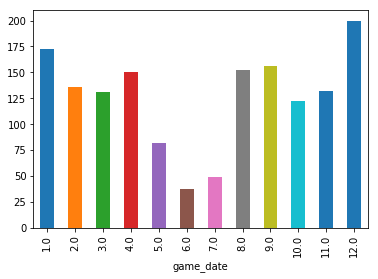

In [32]:
# by month
EPL2012_16.groupby([EPL2012_16['game_date'].dt.month])['season'].count().plot(kind='bar')

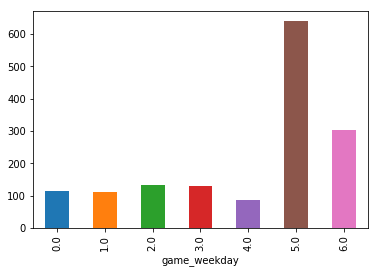

In [34]:
# by week day - most games are on saturday
EPL2012_16.groupby('game_weekday')['season'].count().plot(kind='bar')

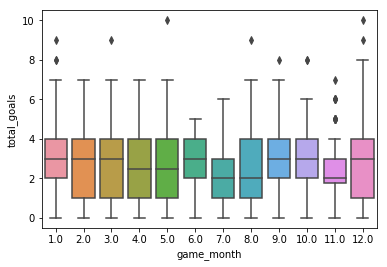

In [35]:
# Goals per month
sns.boxplot(x='game_month', y='total_goals', data=EPL2012_16)

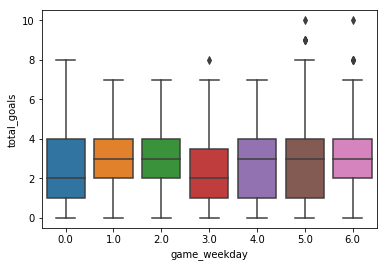

In [36]:
# Goals per gameday
sns.boxplot(x='game_weekday', y='total_goals', data=EPL2012_16)

# How many home and visitor wins Per Team ?

# Which teams win the most away games on average?